In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import sqlite3

In [91]:
df1 = pd.read_csv("./All Data .csv")

In [92]:
df1

,ZipCode,TotalOffenseCount,TotalHomesSold,AverageListPrice,num of school,avg score,AvgOverallRating
0,77002,4674.0,1,380000.00,4,48.50,F
1,77003,2136.0,19,437026.21,76,96.50,A
2,77004,4280.0,45,436192.22,585,74.69,C
3,77007,4153.0,10,480190.00,30,91.33,A
4,77008,2792.0,48,468219.77,336,92.29,A
...,...,...,...,...,...,...,...
75,77546,NaN,2,426950.00,24,91.64,A
76,77571,NaN,26,416698.92,312,69.83,F
77,77581,NaN,1,415000.00,16,89.08,F
78,77586,NaN,6,433835.33,36,71.50,C


In [93]:
df1.isna()

,ZipCode,TotalOffenseCount,TotalHomesSold,AverageListPrice,num of school,avg score,AvgOverallRating
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
75,False,True,False,False,False,False,False
76,False,True,False,False,False,False,False
77,False,True,False,False,False,False,False
78,False,True,False,False,False,False,False


In [94]:
# Specify the columns to consider
columns_to_check = ['ZipCode', 'TotalOffenseCount', 'TotalHomesSold', 'AverageListPrice', 'num of school', 'avg score', 'AvgOverallRating']

# Drop rows with any NaN values in the specified columns
df = df1.dropna(subset=columns_to_check, how='any')

# Display the cleaned DataFrame
print(df)

    ZipCode  TotalOffenseCount  TotalHomesSold  AverageListPrice  \
0     77002             4674.0               1         380000.00   
1     77003             2136.0              19         437026.21   
2     77004             4280.0              45         436192.22   
3     77007             4153.0              10         480190.00   
4     77008             2792.0              48         468219.77   
..      ...                ...             ...               ...   
63    77433                2.0             218         429708.39   
64    77447                2.0              65         405280.58   
65    77449               27.0              35         392329.03   
66    77450                6.0               1         375000.00   
67    77484                4.0               3         424305.33   

    num of school  avg score AvgOverallRating  
0               4      48.50                F  
1              76      96.50                A  
2             585      74.69           

In [95]:
df.iloc[0]

ZipCode                 77002
TotalOffenseCount      4674.0
TotalHomesSold              1
AverageListPrice     380000.0
num of school               4
avg score                48.5
AvgOverallRating            F
Name: 0, dtype: object

In [96]:
print(df.columns)

Index(['ZipCode', 'TotalOffenseCount', 'TotalHomesSold', 'AverageListPrice',
       'num of school', 'avg score', 'AvgOverallRating'],
      dtype='object')


In [97]:
len(df.columns)

7

In [98]:
df

,ZipCode,TotalOffenseCount,TotalHomesSold,AverageListPrice,num of school,avg score,AvgOverallRating
0,77002,4674.0,1,380000.00,4,48.50,F
1,77003,2136.0,19,437026.21,76,96.50,A
2,77004,4280.0,45,436192.22,585,74.69,C
3,77007,4153.0,10,480190.00,30,91.33,A
4,77008,2792.0,48,468219.77,336,92.29,A
...,...,...,...,...,...,...,...
63,77433,2.0,218,429708.39,5014,90.80,A
64,77447,2.0,65,405280.58,195,78.50,C
65,77449,27.0,35,392329.03,1015,85.08,B
66,77450,6.0,1,375000.00,14,89.36,F


In [99]:
df.isna()

,ZipCode,TotalOffenseCount,TotalHomesSold,AverageListPrice,num of school,avg score,AvgOverallRating
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
63,False,False,False,False,False,False,False
64,False,False,False,False,False,False,False
65,False,False,False,False,False,False,False
66,False,False,False,False,False,False,False


In [100]:
#save the new csv file
# df.to_csv('All Data no null.csv')

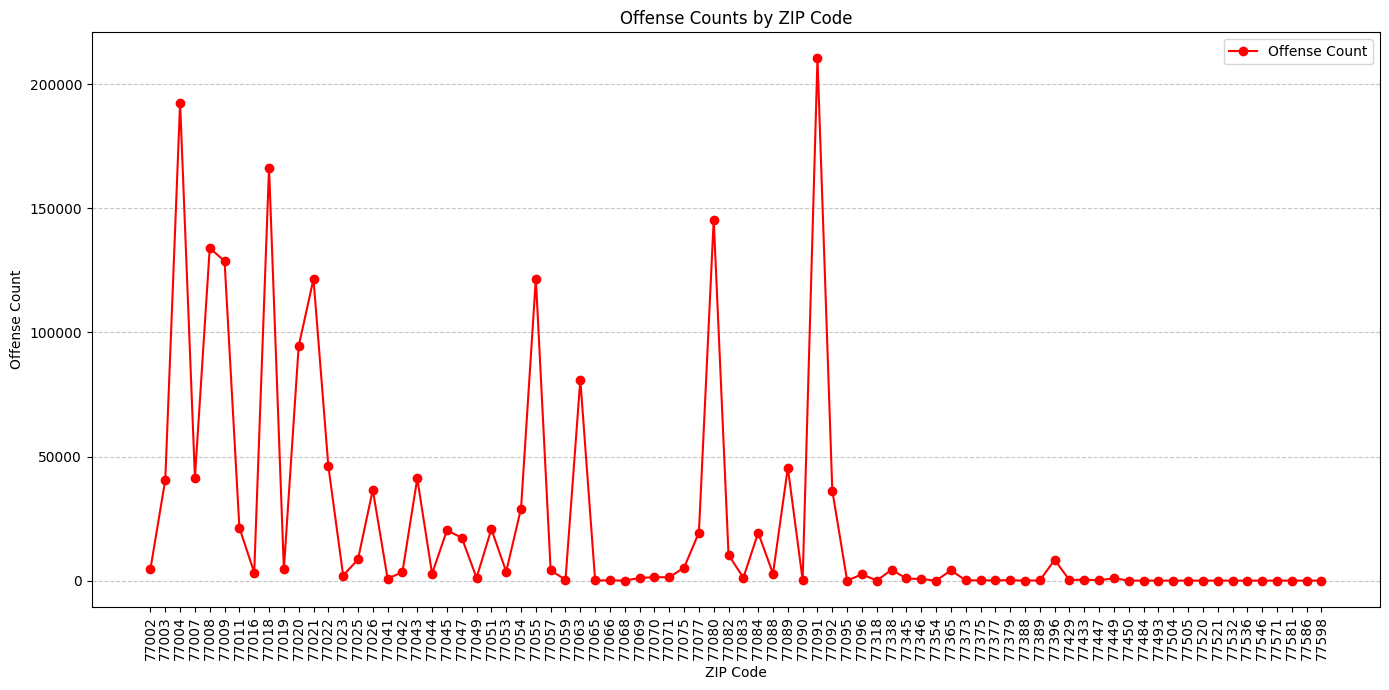

In [106]:
conn = sqlite3.connect('./All Data.db')
cursor = conn.cursor()

# Execute the SQL query
sql_query = """
SELECT 
    m.ZipCode,
    COALESCE(SUM(crime.OffenseCount), 0) AS OffenseCount
FROM MLS2 m
LEFT JOIN "Crime Rate Capstone" crime ON m.ZipCode = crime.ZIPCode
GROUP BY m.ZipCode
ORDER BY m.ZipCode;
"""

# Fetch the data into a DataFrame
df = pd.read_sql_query(sql_query, conn)

# Close the database connection
conn.close()

# Create a figure with a size of 14x7 inches
plt.figure(figsize=(14, 7))

# Plot the line chart for Offense Count
plt.plot(df['ZipCode'].astype(str), df['OffenseCount'], marker='o', linestyle='-', color='red', label='Offense Count')

# Set the title, x-axis label, and y-axis label
plt.title('Offense Counts by ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Offense Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display a legend to distinguish the line
plt.legend()

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Use "tight layout" to fit into the figure area and minimize overlap
plt.tight_layout()

# Show the chart
plt.show()


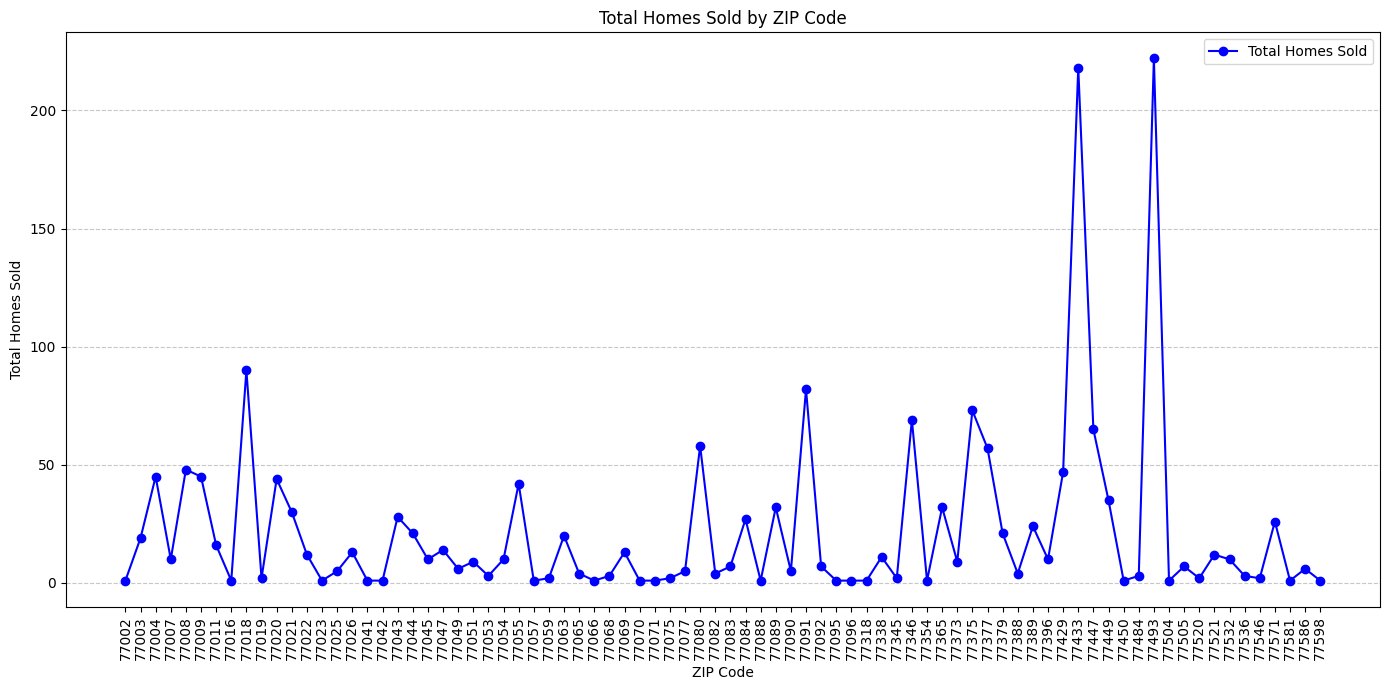

In [83]:
conn = sqlite3.connect('./All Data.db')
cursor = conn.cursor()

# Execute the SQL query
sql_query_homes_sold = """
SELECT 
    m.ZipCode,
    COUNT(m.MLSNumber) AS TotalHomesSold
FROM MLS2 m
GROUP BY m.ZipCode
ORDER BY m.ZipCode;
"""

# Fetch the data into a DataFrame
df_homes_sold = pd.read_sql_query(sql_query_homes_sold, conn)

# Close the database connection
conn.close()

# Create a figure with a size of 14x7 inches
plt.figure(figsize=(14, 7))

# Plot the line chart for Total Homes Sold
plt.plot(df_homes_sold['ZipCode'].astype(str), df_homes_sold['TotalHomesSold'], marker='o', linestyle='-', color='blue', label='Total Homes Sold')

# Set the title, x-axis label, and y-axis label
plt.title('Total Homes Sold by ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Total Homes Sold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display a legend to distinguish the line
plt.legend()

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Use "tight layout" to fit into the figure area and minimize overlap
plt.tight_layout()

# Show the chart
plt.show()

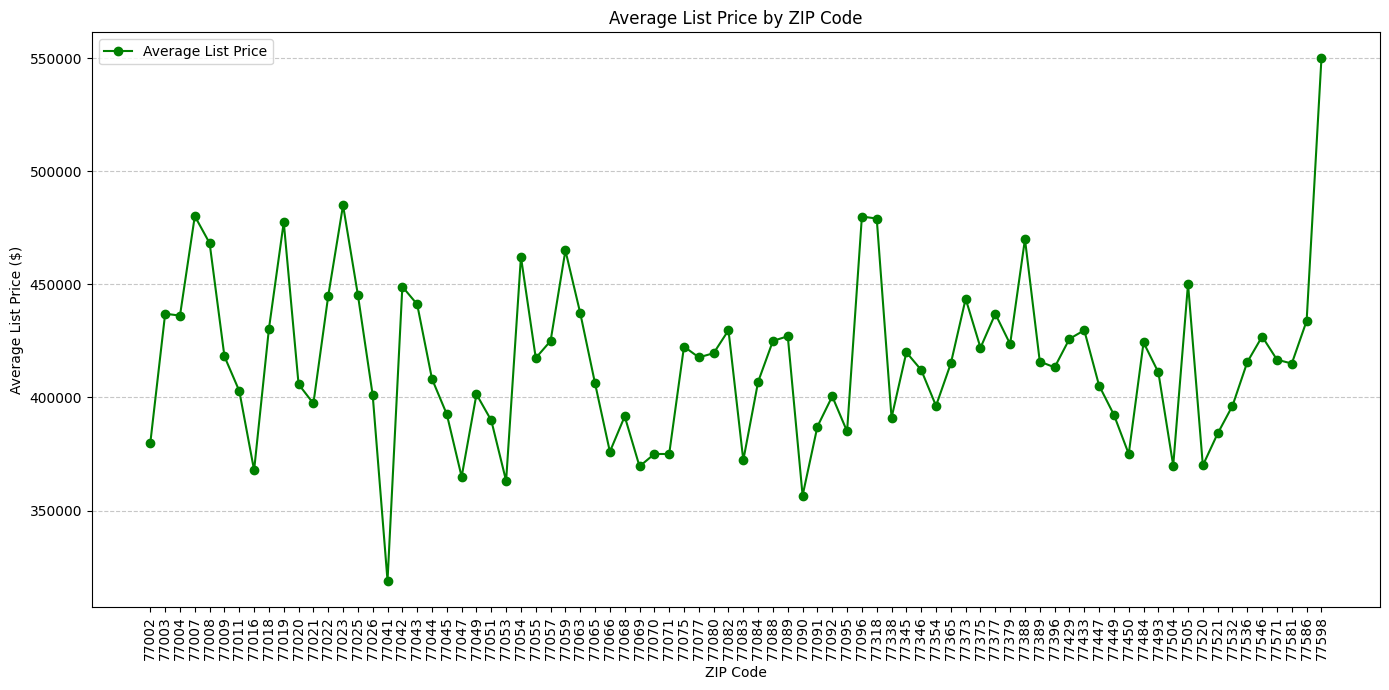

In [84]:
conn = sqlite3.connect('./All Data.db')
cursor = conn.cursor()

# Execute the SQL query
sql_query_avg_price = """
SELECT 
    m.ZipCode,
    AVG(CAST(REPLACE(SUBSTR(m.ListPrice, 2), ',', '') AS DECIMAL(10, 2))) AS AverageListPrice
FROM MLS2 m
GROUP BY m.ZipCode
ORDER BY m.ZipCode;
"""

# Fetch the data into a DataFrame
df_avg_price = pd.read_sql_query(sql_query_avg_price, conn)

# Close the database connection
conn.close()

# Create a figure with a size of 14x7 inches
plt.figure(figsize=(14, 7))

# Plot the line chart for Average List Price
plt.plot(df_avg_price['ZipCode'].astype(str), df_avg_price['AverageListPrice'], marker='o', linestyle='-', color='green', label='Average List Price')

# Set the title, x-axis label, and y-axis label
plt.title('Average List Price by ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Average List Price ($)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display a legend to distinguish the line
plt.legend()

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Use "tight layout" to fit into the figure area and minimize overlap
plt.tight_layout()

# Show the chart
plt.show()


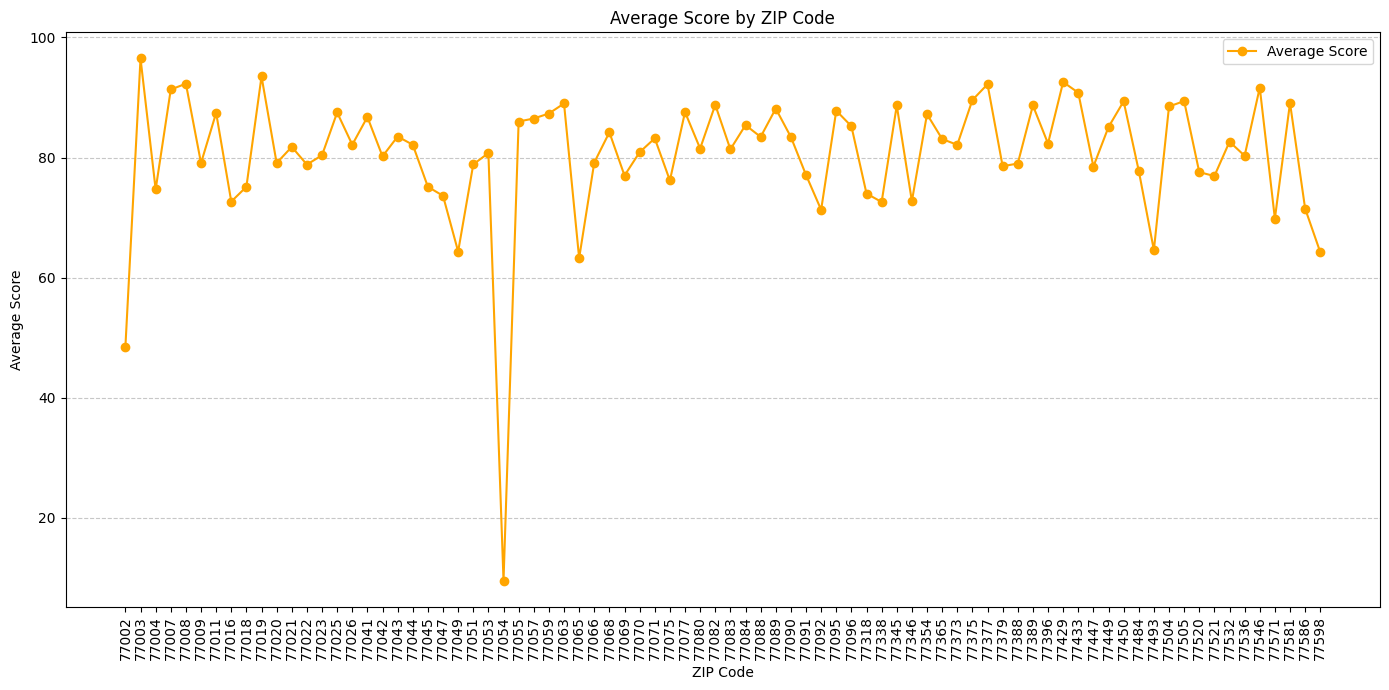

In [85]:
conn = sqlite3.connect('./All Data.db')
cursor = conn.cursor()

# Execute the SQL query
sql_query = """
SELECT 
    m.ZipCode,
	ROUND(AVG(r.OverallScore), 2) AS AvgScore
FROM MLS2 m
LEFT JOIN Schools_2022_to_2023 s ON m.ZipCode = s.Postal
LEFT JOIN statewideoverallaccountabilityratings2022 r ON s.USER_School_Number = r.CampusNumber
GROUP BY m.ZipCode
ORDER BY m.ZipCode;
"""

# Fetch the data into a DataFrame
df = pd.read_sql_query(sql_query, conn)

# Close the database connection
conn.close()

# Create a line graph
plt.figure(figsize=(14, 7))
plt.plot(df['ZipCode'].astype(str), df['AvgScore'], marker='o', linestyle='-', color='orange', label='Average Score')

# Set the title, x-axis label, and y-axis label
plt.title('Average Score by ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Average Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display a legend to distinguish the line
plt.legend()

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Use "tight layout" to fit into the figure area and minimize overlap
plt.tight_layout()

# Show the chart
plt.show()


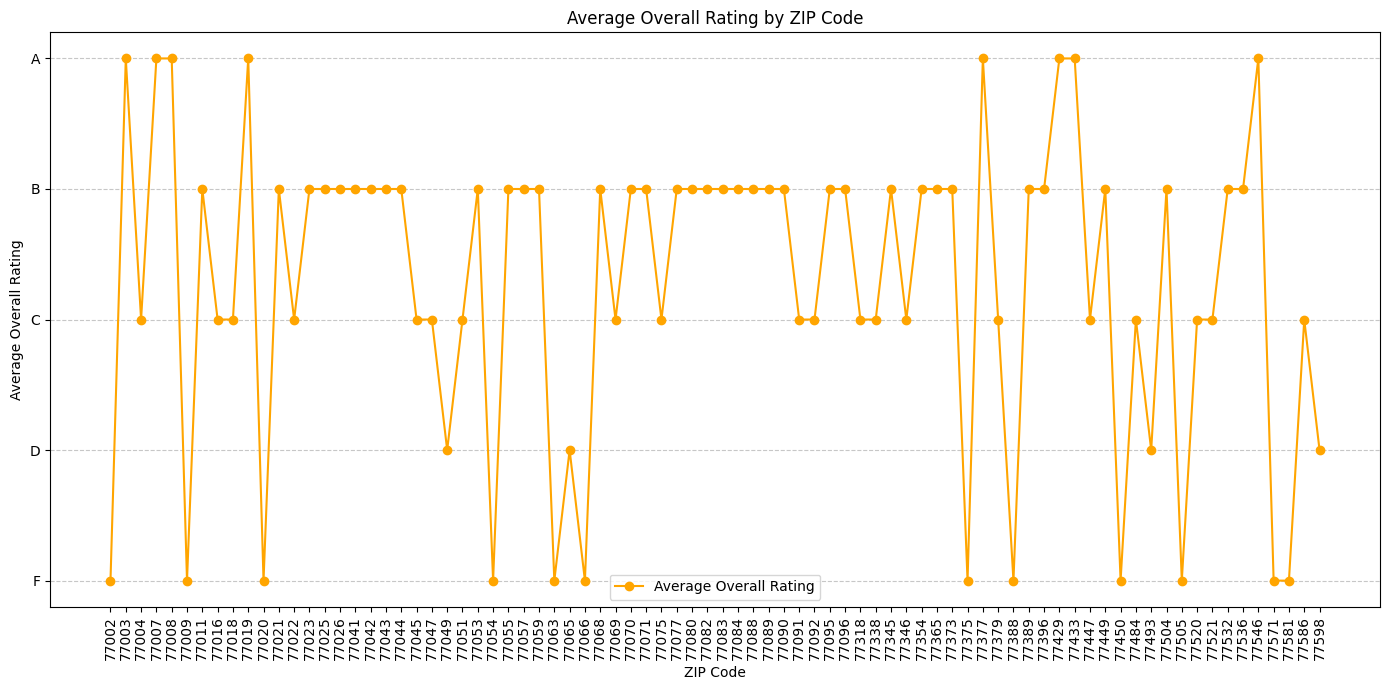

In [86]:
conn = sqlite3.connect('./All Data.db')
cursor = conn.cursor()

# Execute the SQL query
sql_query = """
SELECT 
    m.ZipCode,
    CASE 
        WHEN ROUND(AVG(r.OverallScore), 2) >= 90 AND ROUND(AVG(r.OverallScore), 2) < 100 THEN 'A'
        WHEN ROUND(AVG(r.OverallScore), 2) >= 80 AND ROUND(AVG(r.OverallScore), 2) < 89 THEN 'B'
        WHEN ROUND(AVG(r.OverallScore), 2) >= 70 AND ROUND(AVG(r.OverallScore), 2) < 79 THEN 'C'
        WHEN ROUND(AVG(r.OverallScore), 2) >= 60 AND ROUND(AVG(r.OverallScore), 2) < 69 THEN 'D'
        ELSE 'F'
    END AS AvgOverallRating
FROM MLS2 m
LEFT JOIN Schools_2022_to_2023 s ON m.ZipCode = s.Postal
LEFT JOIN statewideoverallaccountabilityratings2022 r ON s.USER_School_Number = r.CampusNumber
GROUP BY m.ZipCode
ORDER BY m.ZipCode;
"""

# Fetch the data into a DataFrame
df_avg_overall_rating = pd.read_sql_query(sql_query, conn)

# Close the database connection
conn.close()

# Manually map AvgOverallRating to numerical values for sorting
rating_mapping = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'F': 1}
df_avg_overall_rating['RatingOrder'] = df_avg_overall_rating['AvgOverallRating'].map(rating_mapping)

# Create a line graph for AvgOverallRating
plt.figure(figsize=(14, 7))
plt.plot(df_avg_overall_rating['ZipCode'].astype(str), df_avg_overall_rating['RatingOrder'], marker='o', linestyle='-', color='orange', label='Average Overall Rating')

# Set the title, x-axis label, and y-axis label
plt.title('Average Overall Rating by ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Average Overall Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set the order of Y-axis values
plt.yticks(range(1, 6), sorted(rating_mapping.keys(), reverse=True))

# Display a legend to distinguish the line
plt.legend()

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Use "tight layout" to fit into the figure area and minimize overlap
plt.tight_layout()

# Show the chart
plt.show()

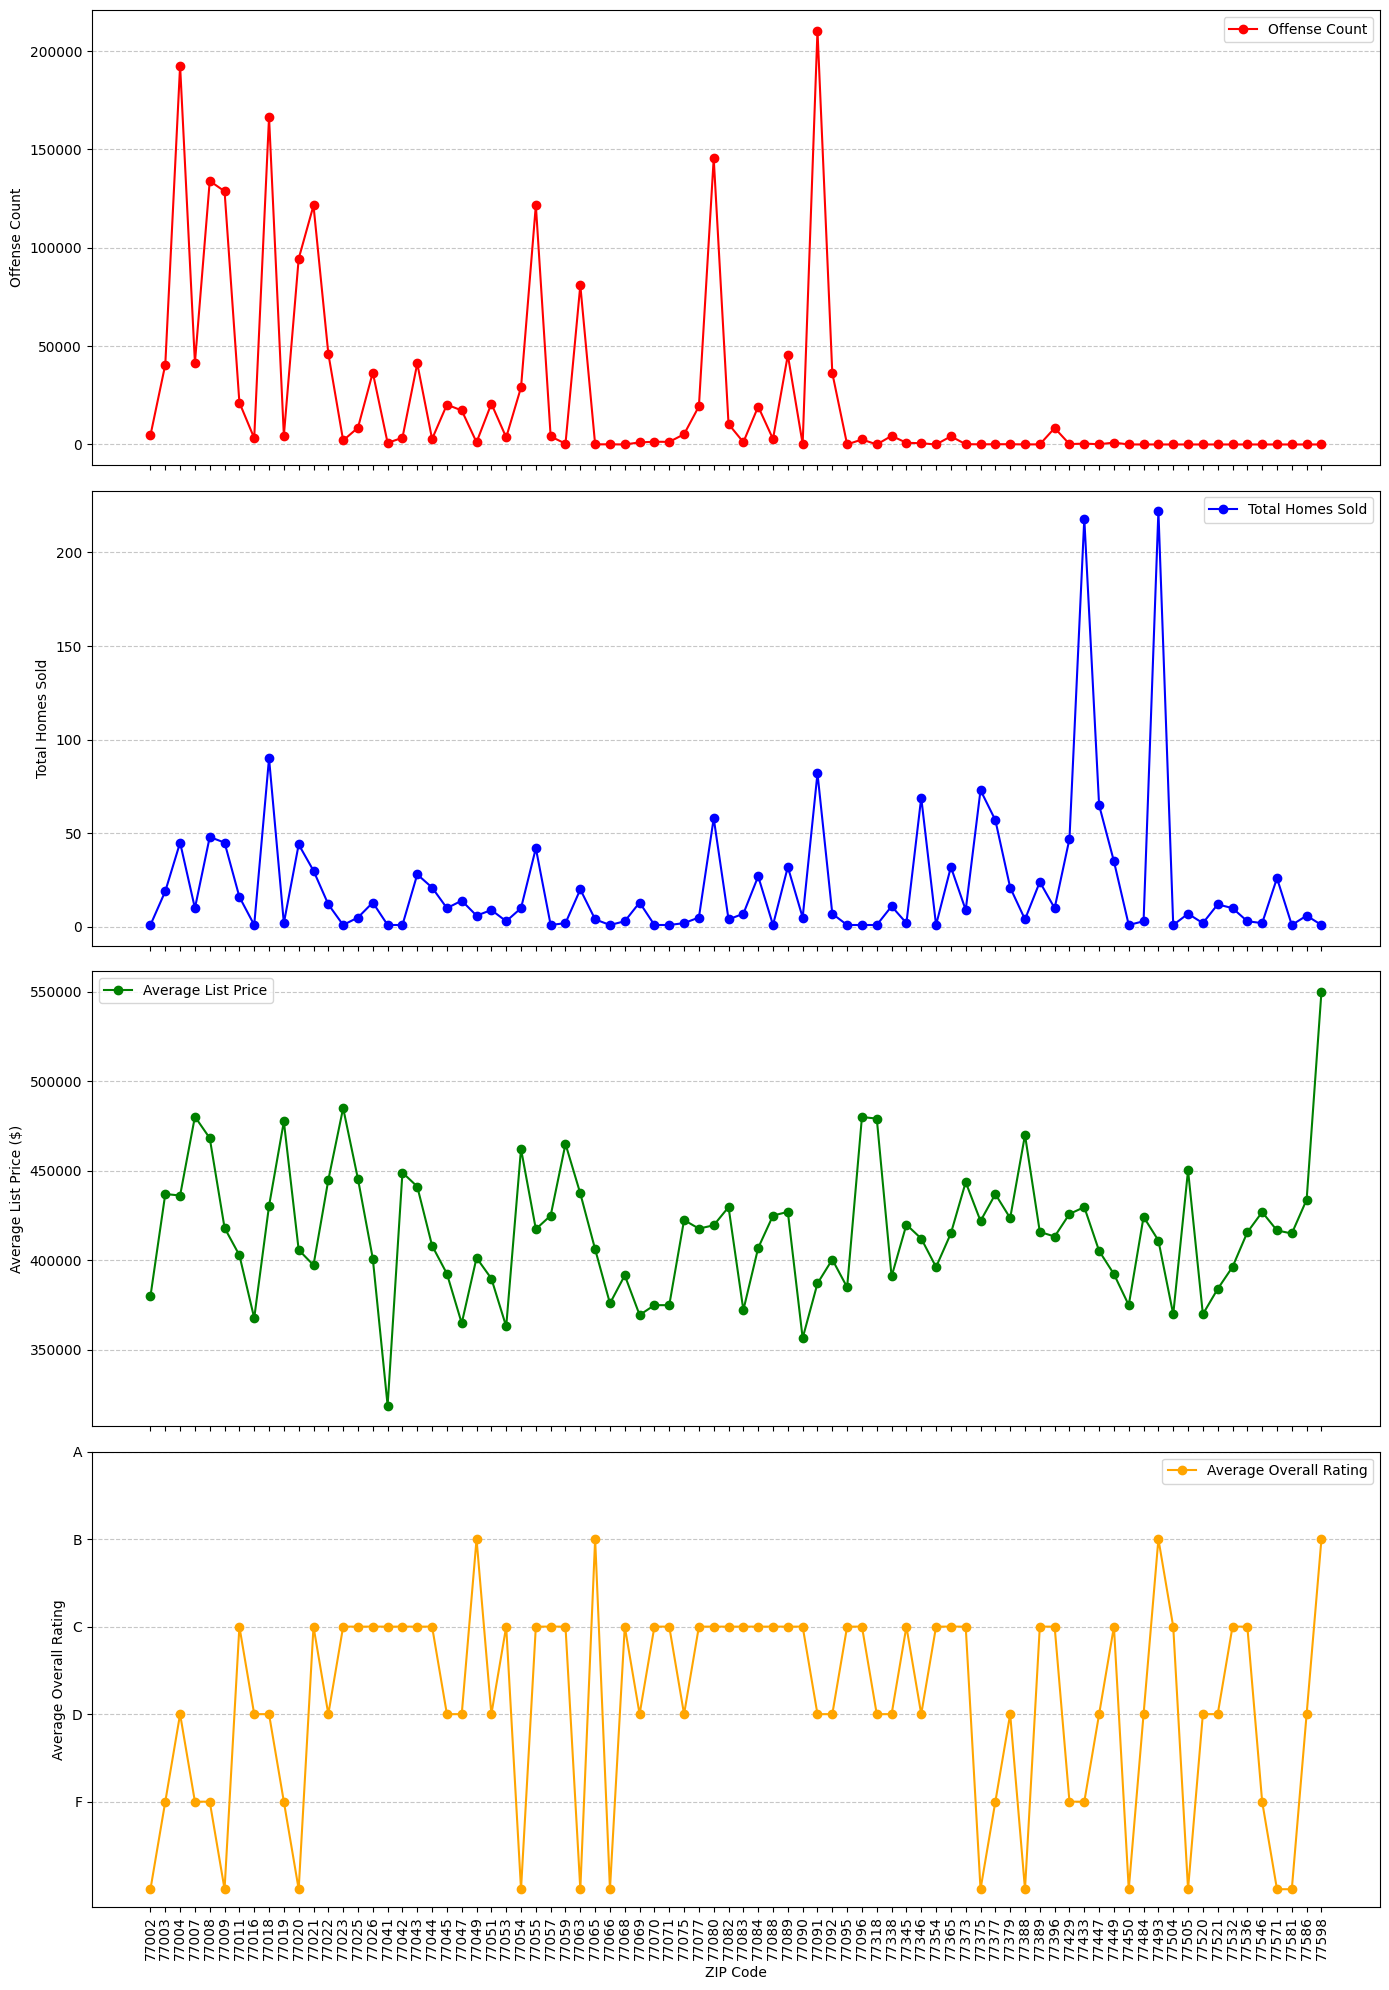

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# Connect to the database
conn = sqlite3.connect('./All Data.db')
cursor = conn.cursor()

# Fetch the data for each plot
sql_query_offense_count = """
SELECT 
    m.ZipCode,
    COALESCE(SUM(crime.OffenseCount), 0) AS OffenseCount
FROM MLS2 m
LEFT JOIN "Crime Rate Capstone" crime ON m.ZipCode = crime.ZIPCode
GROUP BY m.ZipCode
ORDER BY m.ZipCode;
"""
df_offense_count = pd.read_sql_query(sql_query_offense_count, conn)

sql_query_homes_sold = """
SELECT 
    m.ZipCode,
    COUNT(m.MLSNumber) AS TotalHomesSold
FROM MLS2 m
GROUP BY m.ZipCode
ORDER BY m.ZipCode;
"""
df_homes_sold = pd.read_sql_query(sql_query_homes_sold, conn)

sql_query_avg_price = """
SELECT 
    m.ZipCode,
    AVG(CAST(REPLACE(SUBSTR(m.ListPrice, 2), ',', '') AS DECIMAL(10, 2))) AS AverageListPrice
FROM MLS2 m
GROUP BY m.ZipCode
ORDER BY m.ZipCode;
"""
df_avg_price = pd.read_sql_query(sql_query_avg_price, conn)

sql_query_avg_overall_rating = """
SELECT 
    m.ZipCode,
    CASE 
        WHEN ROUND(AVG(r.OverallScore), 2) >= 90 AND ROUND(AVG(r.OverallScore), 2) < 100 THEN 'A'
        WHEN ROUND(AVG(r.OverallScore), 2) >= 80 AND ROUND(AVG(r.OverallScore), 2) < 89 THEN 'B'
        WHEN ROUND(AVG(r.OverallScore), 2) >= 70 AND ROUND(AVG(r.OverallScore), 2) < 79 THEN 'C'
        WHEN ROUND(AVG(r.OverallScore), 2) >= 60 AND ROUND(AVG(r.OverallScore), 2) < 69 THEN 'D'
        ELSE 'F'
    END AS AvgOverallRating
FROM MLS2 m
LEFT JOIN Schools_2022_to_2023 s ON m.ZipCode = s.Postal
LEFT JOIN statewideoverallaccountabilityratings2022 r ON s.USER_School_Number = r.CampusNumber
GROUP BY m.ZipCode
ORDER BY m.ZipCode;
"""
df_avg_overall_rating = pd.read_sql_query(sql_query_avg_overall_rating, conn)

# Close the database connection
conn.close()

# Create subplots with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

# Plot for Offense Count
axs[0].plot(df_offense_count['ZipCode'].astype(str), df_offense_count['OffenseCount'], marker='o', linestyle='-', color='red', label='Offense Count')
axs[0].set_ylabel('Offense Count')
axs[0].legend()

# Plot for Total Homes Sold
axs[1].plot(df_homes_sold['ZipCode'].astype(str), df_homes_sold['TotalHomesSold'], marker='o', linestyle='-', color='blue', label='Total Homes Sold')
axs[1].set_ylabel('Total Homes Sold')
axs[1].legend()

# Plot for Average List Price
axs[2].plot(df_avg_price['ZipCode'].astype(str), df_avg_price['AverageListPrice'], marker='o', linestyle='-', color='green', label='Average List Price')
axs[2].set_ylabel('Average List Price ($)')
axs[2].legend()

# Plot for Average Overall Rating
axs[3].plot(df_avg_overall_rating['ZipCode'].astype(str), df_avg_overall_rating['AvgOverallRating'], marker='o', linestyle='-', color='orange', label='Average Overall Rating')
axs[3].set_ylabel('Average Overall Rating')
axs[3].set_xlabel('ZIP Code')
axs[3].legend()

# Manually map AvgOverallRating to numerical values for sorting
rating_mapping = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'F': 1}
df_avg_overall_rating['RatingOrder'] = df_avg_overall_rating['AvgOverallRating'].map(rating_mapping)

# Set the order of Y-axis values
plt.yticks(range(1, 6), sorted(rating_mapping.keys(), reverse=True))

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add gridlines for better readability
for ax in axs:
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Use "tight layout" to fit into the figure area and minimize overlap
plt.tight_layout()

# Show the chart
plt.show()


In [88]:
ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax4.set_yticklabels([])


NameError: name 'ax1' is not defined

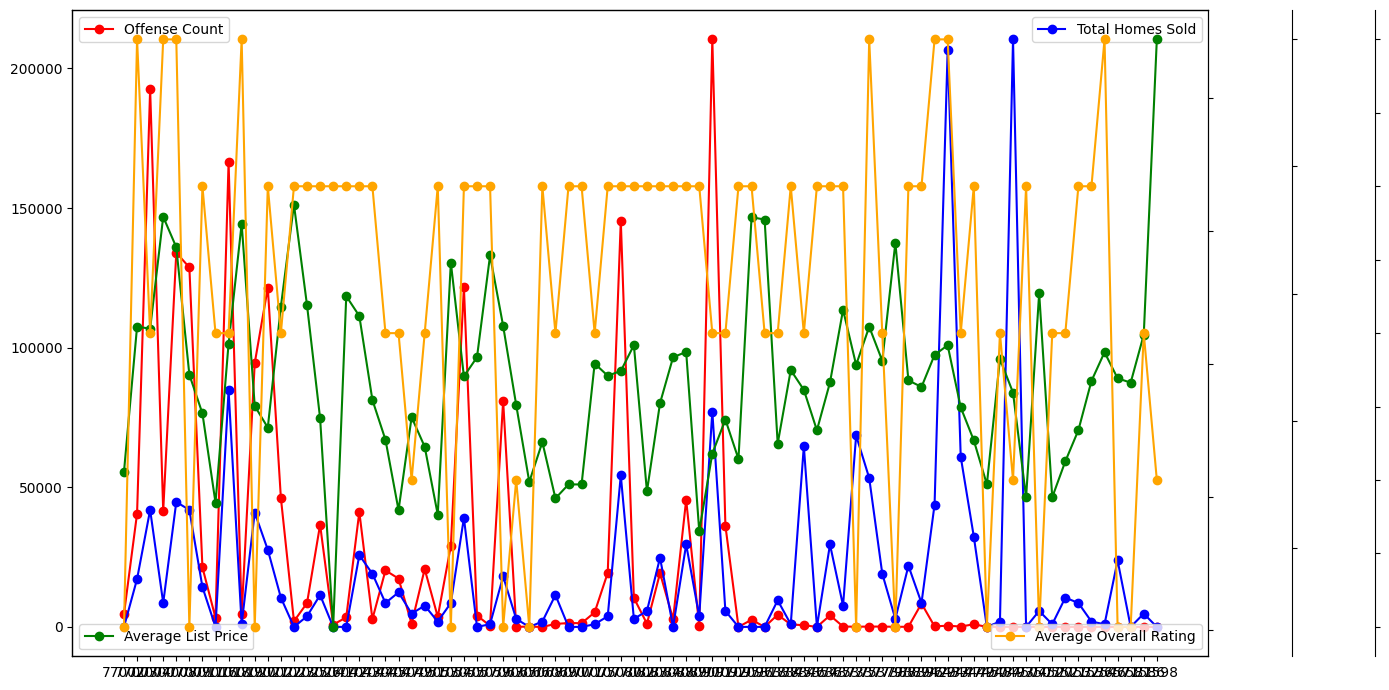

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# Connect to the database
conn = sqlite3.connect('./All Data.db')
cursor = conn.cursor()

# Fetch the data for each plot
# ... (Your SQL queries for df_offense_count, df_homes_sold, df_avg_price, df_avg_overall_rating)

# Close the database connection
conn.close()

# Create a single plot for all lines
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot for Offense Count
ax1.plot(df_offense_count['ZipCode'].astype(str), df_offense_count['OffenseCount'], marker='o', linestyle='-', color='red', label='Offense Count')

# Create a secondary y-axis for Total Homes Sold
ax2 = ax1.twinx()
ax2.plot(df_homes_sold['ZipCode'].astype(str), df_homes_sold['TotalHomesSold'], marker='o', linestyle='-', color='blue', label='Total Homes Sold')
ax2.set_yticklabels([])

# Create a tertiary y-axis for Average List Price
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(df_avg_price['ZipCode'].astype(str), df_avg_price['AverageListPrice'], marker='o', linestyle='-', color='green', label='Average List Price')
ax3.set_yticklabels([])

# Create a quaternary y-axis for Average Overall Rating
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))
ax4.plot(df_avg_overall_rating['ZipCode'].astype(str), df_avg_overall_rating['RatingOrder'], marker='o', linestyle='-', color='orange', label='Average Overall Rating')
ax4.set_yticklabels([])

# Manually map AvgOverallRating to numerical values for sorting
rating_mapping = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'F': 1}
df_avg_overall_rating['RatingOrder'] = df_avg_overall_rating['AvgOverallRating'].map(rating_mapping)

# Display a legend to distinguish the lines
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='lower left')
ax4.legend(loc='lower right')

# Use "tight layout" to fit into the figure area and minimize overlap
plt.tight_layout()

# Show the chart
plt.show()



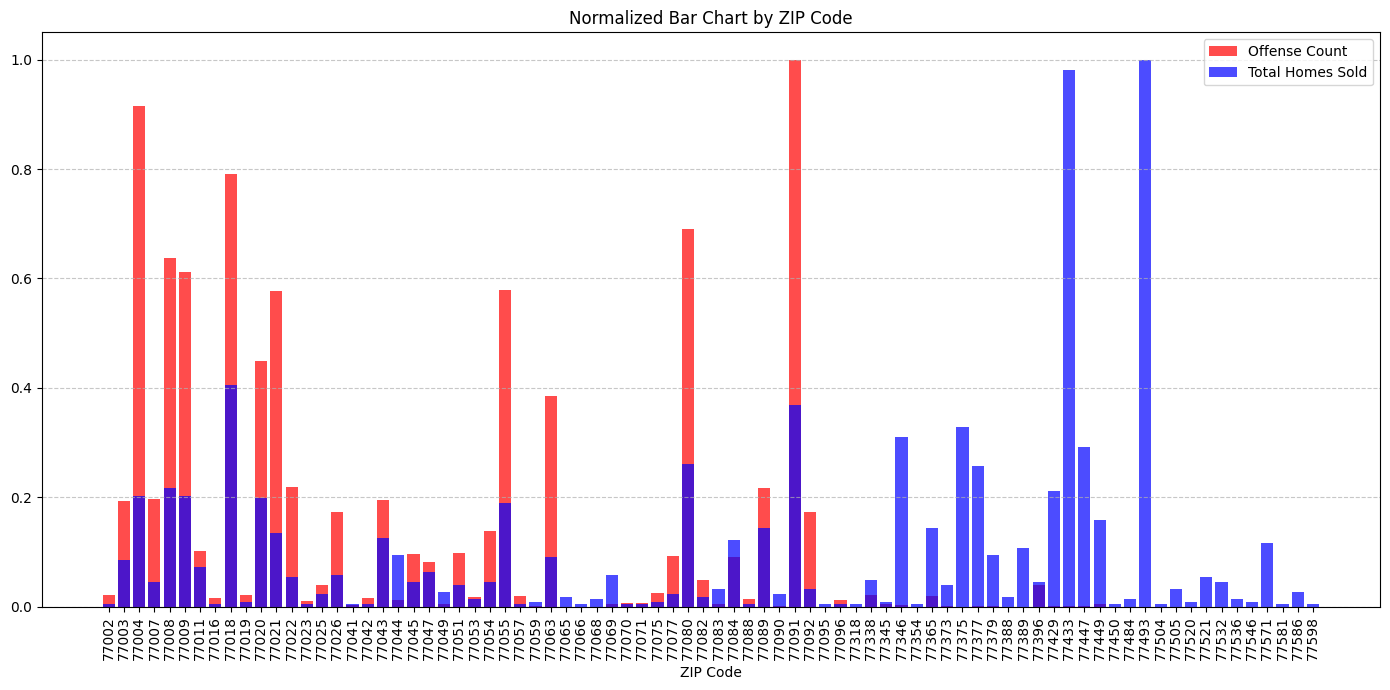

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# Connect to the database
conn = sqlite3.connect('./All Data.db')
cursor = conn.cursor()

# Fetch the data for each plot
# ... (Your SQL queries for df_offense_count, df_homes_sold, df_avg_price, df_avg_overall_rating)

# Close the database connection
conn.close()

# Create a single plot for all bars
fig, ax = plt.subplots(figsize=(14, 7))

# Normalize the data for each plot
df_offense_count['OffenseCountNormalized'] = df_offense_count['OffenseCount'] / df_offense_count['OffenseCount'].max()
df_homes_sold['TotalHomesSoldNormalized'] = df_homes_sold['TotalHomesSold'] / df_homes_sold['TotalHomesSold'].max()
# df_avg_price['AverageListPriceNormalized'] = df_avg_price['AverageListPrice'] / df_avg_price['AverageListPrice'].max()
# df_avg_overall_rating['RatingOrderNormalized'] = df_avg_overall_rating['RatingOrder'] / df_avg_overall_rating['RatingOrder'].max()

# Plot the normalized bar chart for Offense Count
ax.bar(df_offense_count['ZipCode'].astype(str), df_offense_count['OffenseCountNormalized'], color='red', alpha=0.7, label='Offense Count')

# Plot the normalized bar chart for Total Homes Sold
ax.bar(df_homes_sold['ZipCode'].astype(str), df_homes_sold['TotalHomesSoldNormalized'], color='blue', alpha=0.7, label='Total Homes Sold')

# # Plot the normalized bar chart for Average List Price
# ax.bar(df_avg_price['ZipCode'].astype(str), df_avg_price['AverageListPriceNormalized'], color='green', alpha=0.7, label='Average List Price')

# # Plot the normalized bar chart for Average Overall Rating
# ax.bar(df_avg_overall_rating['ZipCode'].astype(str), df_avg_overall_rating['RatingOrderNormalized'], color='orange', alpha=0.7, label='Average Overall Rating')

# Display a legend to distinguish the bars
ax.legend()

# Set the title and x-axis label
ax.set_title('Normalized Bar Chart by ZIP Code')
ax.set_xlabel('ZIP Code')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Use "tight layout" to fit into the figure area and minimize overlap
plt.tight_layout()

# Show the chart
plt.show()


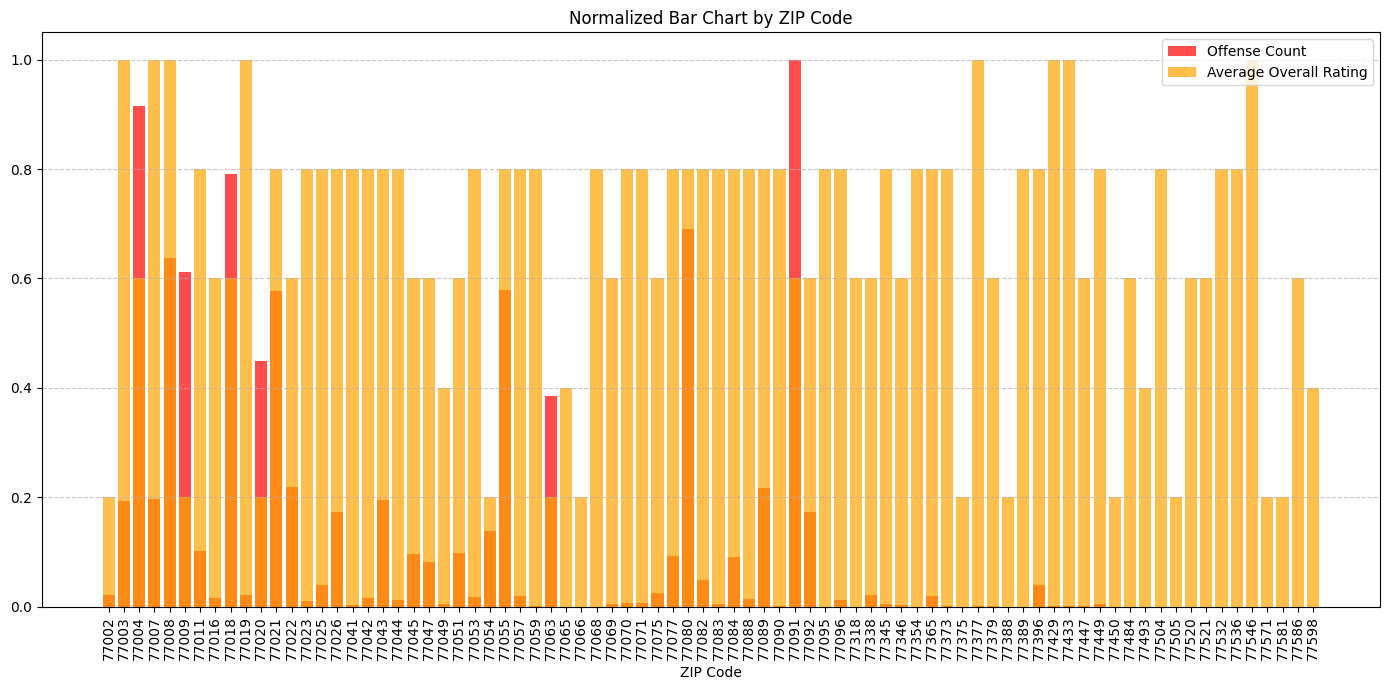

In [ ]:
# Connect to the database
conn = sqlite3.connect('./All Data.db')
cursor = conn.cursor()

# Fetch the data for each plot
# ... (Your SQL queries for df_offense_count, df_homes_sold, df_avg_price, df_avg_overall_rating)

# Close the database connection
conn.close()

# Create a single plot for all bars
fig, ax = plt.subplots(figsize=(14, 7))

# Normalize the data for each plot
df_offense_count['OffenseCountNormalized'] = df_offense_count['OffenseCount'] / df_offense_count['OffenseCount'].max()
# df_homes_sold['TotalHomesSoldNormalized'] = df_homes_sold['TotalHomesSold'] / df_homes_sold['TotalHomesSold'].max()
# df_avg_price['AverageListPriceNormalized'] = df_avg_price['AverageListPrice'] / df_avg_price['AverageListPrice'].max()
df_avg_overall_rating['RatingOrderNormalized'] = df_avg_overall_rating['RatingOrder'] / df_avg_overall_rating['RatingOrder'].max()

# Plot the normalized bar chart for Offense Count
ax.bar(df_offense_count['ZipCode'].astype(str), df_offense_count['OffenseCountNormalized'], color='red', alpha=0.7, label='Offense Count')

# Plot the normalized bar chart for Total Homes Sold
# ax.bar(df_homes_sold['ZipCode'].astype(str), df_homes_sold['TotalHomesSoldNormalized'], color='blue', alpha=0.7, label='Total Homes Sold')

# # Plot the normalized bar chart for Average List Price
# ax.bar(df_avg_price['ZipCode'].astype(str), df_avg_price['AverageListPriceNormalized'], color='green', alpha=0.7, label='Average List Price')

# Plot the normalized bar chart for Average Overall Rating
ax.bar(df_avg_overall_rating['ZipCode'].astype(str), df_avg_overall_rating['RatingOrderNormalized'], color='orange', alpha=0.7, label='Average Overall Rating')

# Display a legend to distinguish the bars
ax.legend()

# Set the title and x-axis label
ax.set_title('Normalized Bar Chart by ZIP Code')
ax.set_xlabel('ZIP Code')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Use "tight layout" to fit into the figure area and minimize overlap
plt.tight_layout()

# Show the chart
plt.show()